![Image](./UNIMAS_logo.png)

# AKN32 Model Development
## By: Awang Khairul Nizzam Awang Azzahari
### Matrix number: 72136

#### Initialization

In [37]:
# Load libraries

# Essential for python to interact with the operating system
import os
import re

# Model development framework
import torch
import torch.nn as nn
import torchvision.models as models


# Image processing functions
import torchvision
from torch.utils.data import Dataset
from torch.utils.data import Subset, random_split
from torchvision.io import read_image
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
from torchvision.datasets import ImageFolder
from tkinter import Image
from PIL import Image

# Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### VGG16 Model Definition
##### Initial Point for adjustments in the AKN32 model

In [38]:
class VGG16(nn.Module):
    def __init__(self, num_classes=1000):
        super(VGG16, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#### AKN32 Model Definition


In [39]:
class AKN32(nn.Module):
    def __init__(self, num_classes=1000):
        super(AKN32, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


#### Model Instantiation

In [40]:
vgg_model = VGG16(num_classes=1000)
akn_model = AKN32(num_classes=4)

# Set the model to evaluation mode before inferencing it

vgg_model.eval()
akn_model.eval()

AKN32(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

#### Training Dataset Batch Transform Code

In [41]:
# Training image applied transforms
transformer = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


#### Dataset Folder Datapath Initialization

In [42]:
train_path = 'C:\\Pytorch_for_fyp\\envfyp\\Data\\resized_traintest15_train19'
train_df = pd.read_csv('C:\\Pytorch_for_fyp\\envfyp\\Data\\labels\\traintestLabels15_trainLabels19.csv')
train_df #check the labels in data

,filename,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
92359,ffa47f6a7bf4,2
92360,ffc04fed30e6,0
92361,ffcf7b45f213,2
92362,ffd97f8cd5aa,0


#### Custom Dataset Implementation

In [43]:
class DiaretDataset(Dataset):
    def __init__(self, data_dir, labels_df, transform=None):
        self.data_dir = data_dir
        self.labels_df = labels_df
        self.transform = transform

    def __getitem__(self, idx):
        # Get the image file name from the labels dataframe
        image_name = self.labels_df.iloc[idx]['filename']
        image_name += ".jpg"  # Append the file extension ".jpg" to the image_name
        image_path = os.path.join(self.data_dir, image_name)
        image = Image.open(image_path).convert("RGB")  # Open and convert to RGB format

        # Apply the desired transformations if needed
        if self.transform is not None:
            image = self.transform(image)

        label = self.labels_df.iloc[idx]['level']  # Get the label for the corresponding image

        return image, label

    def __len__(self):
        return len(self.labels_df)

#### Dataset Instantiation

In [44]:
full_dataset = DiaretDataset('C:\\Pytorch_for_fyp\\envfyp\\Data\\resized_traintest15_train19',
                              'C:\\Pytorch_for_fyp\\envfyp\\Data\\labels\\traintestLabels15_trainLabels19.csv')

#### Dataloading Process

In [45]:
train_dataset = DiaretDataset(train_path, train_df, transformer)
val_dataset = DiaretDataset(train_path, train_df, transformer)
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=1, shuffle=False)



#### Image Display

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Feature batch shape: torch.Size([1, 3, 224, 224])
Labels batch shape: torch.Size([1])


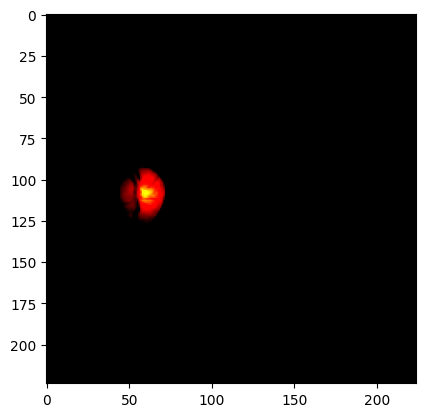

Label: 0


In [46]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze().permute(1, 2, 0)  # Permute dimensions for displaying with matplotlib
label = train_labels[0]
plt.imshow(img)
plt.show()
print(f"Label: {label}")

# image conversion for testing purposes
img_preproc = train_features[0].unsqueeze(0)

#### Dataset classes and tally

0    67148
2    14152
1     6575
3     2280
4     2209
Name: level, dtype: int64

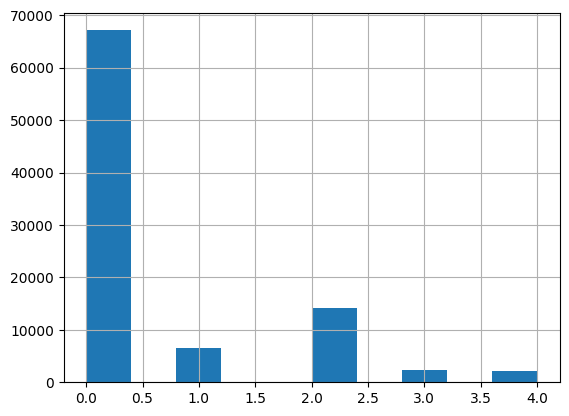

In [47]:
train_df['level'].hist()
train_df['level'].value_counts()

#### Dataset Split for training and testing

In [48]:
# Set the seed for reproducibility
torch.manual_seed(8816001000)

# Define the sizes for training and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

# Split the dataset into training and validation subsets
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Print the sizes of the resulting subsets
print("Training dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))

Training dataset size: 58
Validation dataset size: 15


#### Model inferencing

In [49]:
output_vgg = vgg_model(img_preproc)
output_akn = akn_model(img_preproc)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (672x224 and 4096x1000)

In [ ]:
softmax_vgg = nn.Softmax(dim=1)
probabilities_vgg = softmax_vgg(output_vgg)
_, predicted_vgg_idx = torch.max(probabilities_vgg, 1)
predicted_label_vgg = predicted_vgg_idx.item()
print(predicted_label_vgg)

softmax_akn = nn.Softmax(dim=1)
probabilities_akn = softmax_akn(output_akn)
_, predicted_akn_idx = torch.max(probabilities_akn, 1)
predicted_label_akn = predicted_akn_idx.item()
print(predicted_label_akn)

60
2


In [ ]:
correct_vgg = 0
total_vgg = 0
correct_akn = 0
total_akn = 0

with torch.no_grad():
    for images, labels in val_dataloader:
        output_vgg = vgg_model(img_preproc)  # Forward pass
        _, predicted = torch.max(output_vgg.data, 1)  # Get predicted labels
        total_vgg += labels.size(0)
        correct_vgg += (predicted == labels).sum().item()

accuracy = correct_vgg / total_vgg
print(f"Test Accuracy: {accuracy:.4f}")

with torch.no_grad():
    for images, labels in val_dataloader:
        output_akn = akn_model(img_preproc)  # Forward pass
        _, predicted = torch.max(output_akn.data, 1)  # Get predicted labels
        total_akn += labels.size(0)
        correct_akn += (predicted == labels).sum().item()

accuracy = correct_akn / total_akn
print(f"Test Accuracy: {accuracy:.4f}")

KeyboardInterrupt: 

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
            running_loss = 0.0
            running_corrects = 0
            # Iterate over data.
            for inputs, labels in trainloader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()
            epoch_loss = running_loss / dataset_sizes
            epoch_acc = running_corrects.double() / dataset_sizes
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            # deep copy the model
        print()
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

model_ft = train_model(vgg_model, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

NameError: name 'criterion' is not defined